## Лабораторная №5. Задание 1

In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

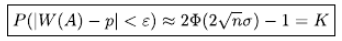

1. Моделирование случайного события A - ожидание автобуса\
T - случайная величина, распределенная по логнормальному закону\
M[T] = 10 минут - среднее время ожидания автобуса\
σ[T] = 3 минута - отклонение от среднего времени ожидания автобуса\

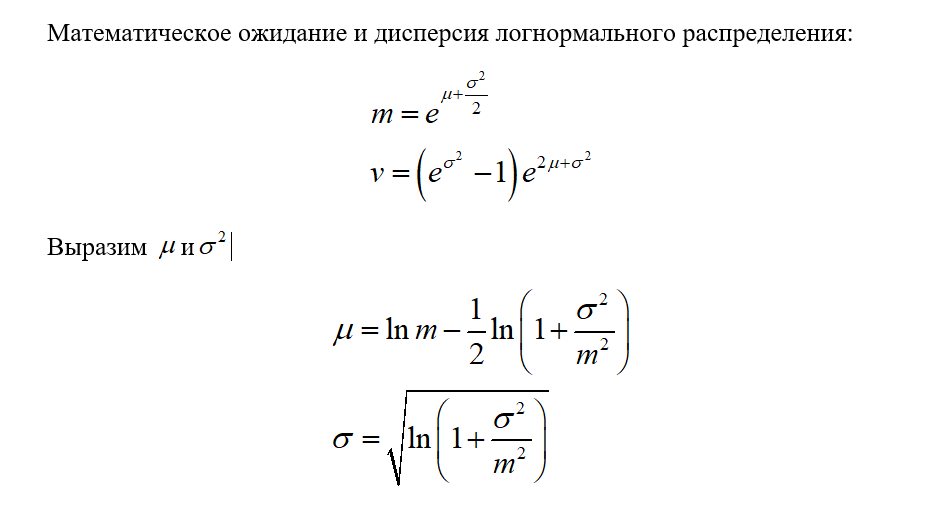

Логнормальный закон распределения. Определение статистической вероятности

In [14]:
# Моделирование случайного события A - ожидание автобуса менее 5 минут

# Исходные данные:
# T - случайная величина, распределенная по логнормальному закону
# mean_T = 5 минут - параметр m (математическое ожидание)
# std_T = 3 минуты - стандартное отклонение (не σ из формулы, а общее обозначение)

mean_T = 5
std_T = 3

# Преобразование параметров логнормального распределения к нормальному:
# Для логнормального распределения: если X ~ LogNormal(μ, σ²), то ln(X) ~ N(μ, σ²)
# Формулы преобразования:
# μ = ln(m) - 0.5 * ln(1 + v/m²), где v = σ² (дисперсия)
# σ² = ln(1 + v/m²)

# Вычисление параметра μ для нормального распределения
mean_norm = np.log(mean_T) - 0.5 * np.log(1 + (std_T**2)/(mean_T**2))

# Вычисление параметра σ для нормального распределения (std_norm = √σ²)
std_norm = np.sqrt(np.log(1 + (std_T**2)/(mean_T**2)))

# Генерация выборки из логнормального распределения:
# s = std_norm - параметр формы (σ из нормального распределения)
# scale = exp(mean_norm) - масштабный параметр
# size=10 - объем выборки (10 случайных значений времени ожидания)

T_values = stats.lognorm.rvs(s=std_norm, scale=np.exp(mean_norm), size=10)

# Вычисление статистической вероятности события A:
# Событие A: время ожидания автобуса T < 5 минут
# W(A) = (количество значений < 5) / (общий объем выборки)

W_A = np.mean(T_values < 5)

# Вывод результатов
print("T_values:", T_values)
print(f"Статистическая вероятность W(A) = {W_A:.2f}")

T_values: [ 3.75333482 12.00538396  1.5327863   5.8131143   6.51362519  1.52378556
 10.17050334  3.87402014  2.19767895  7.42881117]
Статистическая вероятность W(A) = 0.50


Оценка вероятности отклонения частоты на eps = 0.1

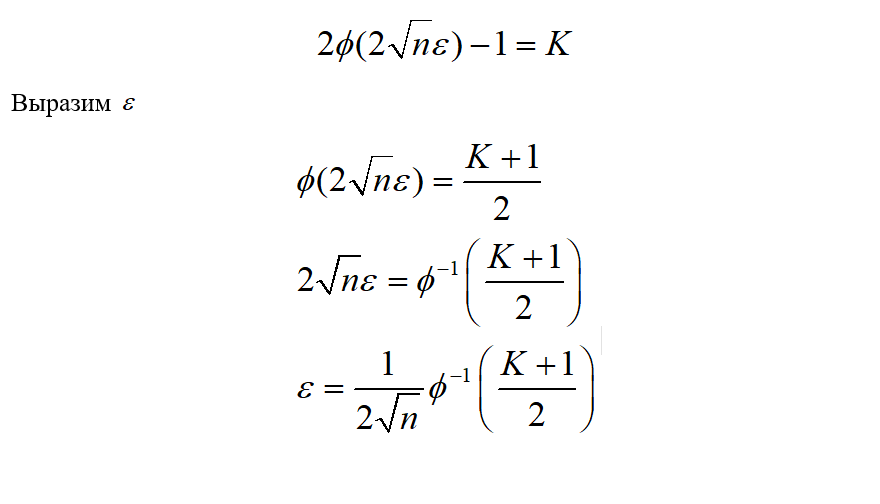
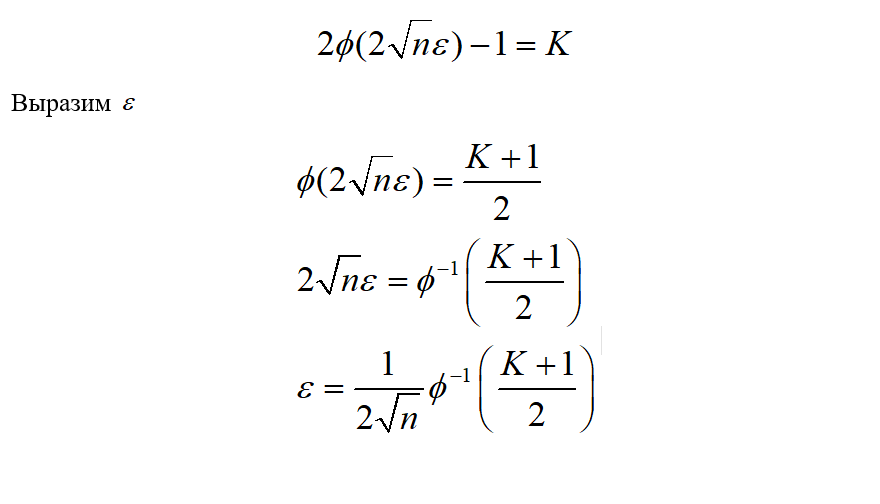

In [15]:
# Оценка вероятности отклонения частоты события от вероятности
# Связь между точностью ε, надежностью K и объемом выборки n

# Параметры:
# n = 10 - объем выборки
# known_eps = 0.1 - заданное значение точности (отклонение)
# known_K = 0.47 - заданное значение надежности (вероятность)

n = 10
known_eps = 0.1
known_K = 0.47

# Часть 1: Вычисление надежности K при заданной точности ε
# Формула: K = 2Φ(2√n·ε) - 1
# где Φ - функция распределения стандартного нормального закона
# Это формула для оценки вероятности того, что отклонение частоты
# от вероятности не превысит ε

K = 2 * stats.norm.cdf(2 * np.sqrt(n) * known_eps) - 1
print(f"K = {K:.4f}, при eps = {known_eps}")
# Вывод: При выборке n=10 и точности ε=0.1, 
# вероятность того, что отклонение не превысит 0.1, равна K

# Часть 2: Вычисление точности ε при заданной надежности K
# Формула, обратная к предыдущей:
# ε = Φ⁻¹((K+1)/2) / (2√n)
# где Φ⁻¹ - квантиль стандартного нормального распределения

eps = stats.norm.ppf((known_K + 1) / 2) / (2 * np.sqrt(n))
print(f"eps = {eps:.4f}, при K = {known_K}")
# Вывод: При выборке n=10 и надежности K=0.47,
# точность оценки составляет ε

K = 0.4729, при eps = 0.1
eps = 0.0993, при K = 0.47


Примерно в 47% случаев условие |W(A) - p| < eps будет выполняться

Проверка K в N = 100 экспериментов

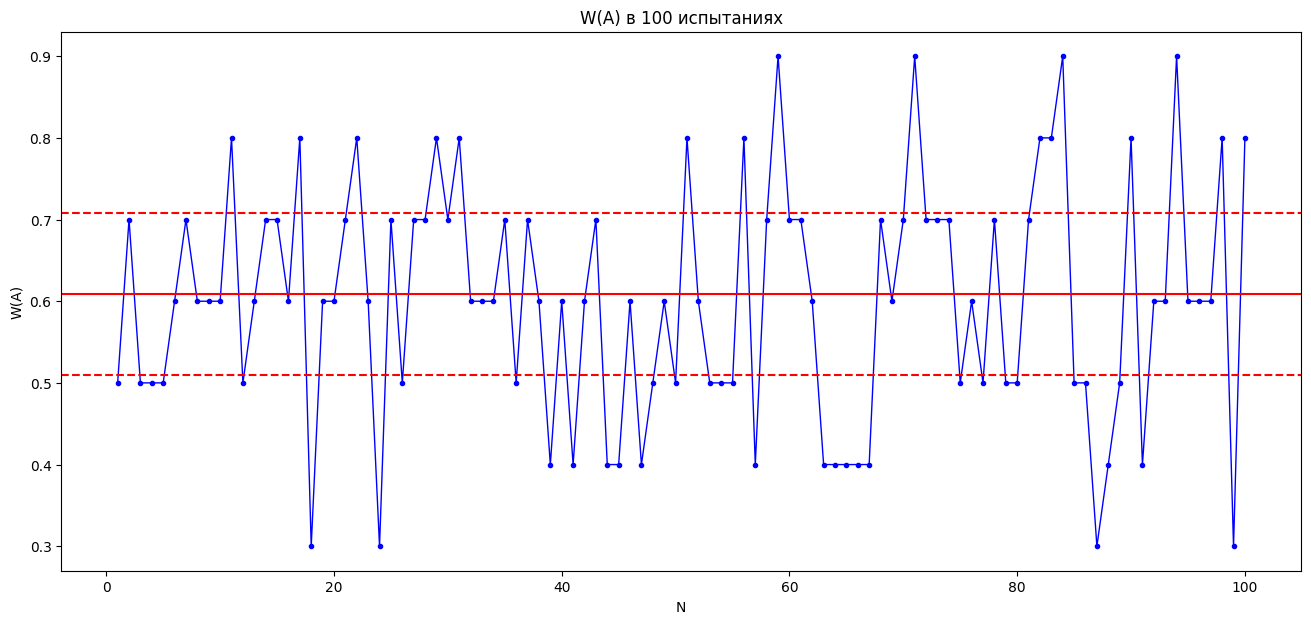

Количество значений, которые попали в диапазон p ± eps: 48


In [16]:
# Проверка теоретической надежности K на практике методом Монте-Карло
# Мы проведем N=100 независимых экспериментов, каждый с выборкой объема n=10
# и проверим, в какой доле экспериментов выполняется условие |W(A) - p| < ε

N = 100

# Список для хранения оценок W(A) из каждого эксперимента
tests = []

# Номера экспериментов от 1 до N
tests_number = np.arange(1, N+1)

# Проведение N экспериментов
for i in range(N):
    # Генерация выборки времени ожидания (10 значений) из логнормального распределения
    T_values = stats.lognorm.rvs(s=std_norm, scale=np.exp(mean_norm), size=10)
    # Вычисление статистической вероятности W(A) для текущего эксперимента
    # W(A) = (количество значений < 5) / 10
    W_A = np.mean(T_values < 5)
    # Сохранение результата эксперимента
    tests.append(W_A)

# Вычисление теоретической вероятности p = P(T < 5)
# Используем функцию распределения логнормального закона
p = stats.lognorm.cdf(5, s=std_norm, scale=np.exp(mean_norm))

# Подсчет количества экспериментов, в которых выполняется условие |W(A) - p| < ε
# то есть p - ε ≤ W(A) ≤ p + ε
successful_tests = np.sum((tests >= (p - eps)) & (tests <= (p + eps)))

# Визуализация результатов 100 экспериментов
plt.figure(figsize=[16, 7])
plt.title("W(A) в 100 испытаниях")

# График оценок W(A) для каждого эксперимента
plt.plot(tests_number, tests, 'b-o', linewidth=1, markersize=3)
plt.xlabel("N")  # Номер эксперимента
plt.ylabel("W(A)")  # Оценка вероятности

# Горизонтальные линии для наглядности:
# Красная сплошная линия - теоретическая вероятность p
plt.axhline(p, color='red')
# Красные пунктирные линии - границы p ± ε
plt.axhline(p+eps, ls='--', color='red')
plt.axhline(p-eps, ls='--', color='red')

plt.show()

# Вывод количества успешных экспериментов (где условие выполняется)
print(f"Количество значений, которые попали в диапазон p ± eps: {successful_tests}")
# Теоретически ожидаемое количество: около K*100 = 47 из 100

Наш исходный процент попадания в диапазон p ± eps = 47%. Исходя из результата проведения 100 испытаний мы получили близкое к исходному значение,\
что говорит нам о справедливости следствия теоремы Ляпунова (Центральной предельной теоремы)

Количество испытаний при eps = 0.1, K = 0.9

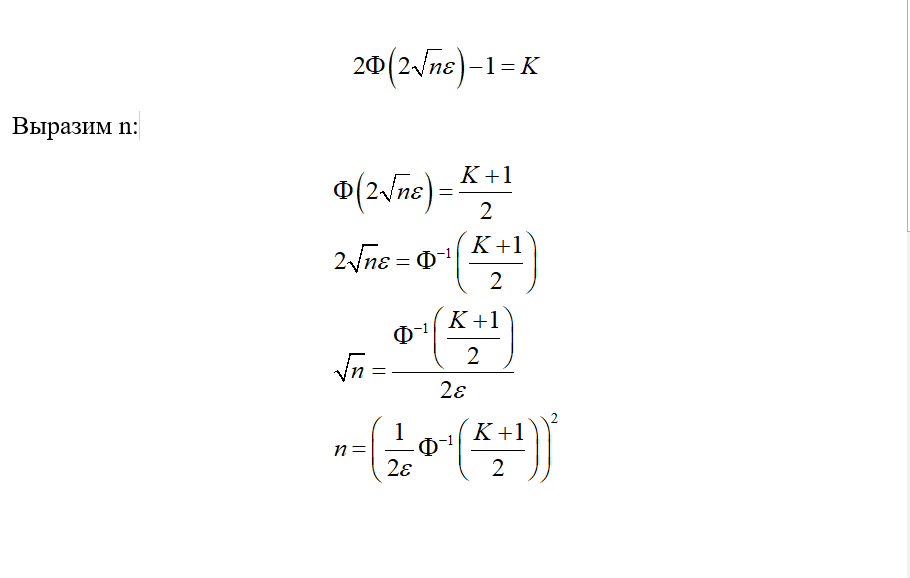

Полученное количество испытаний = 67


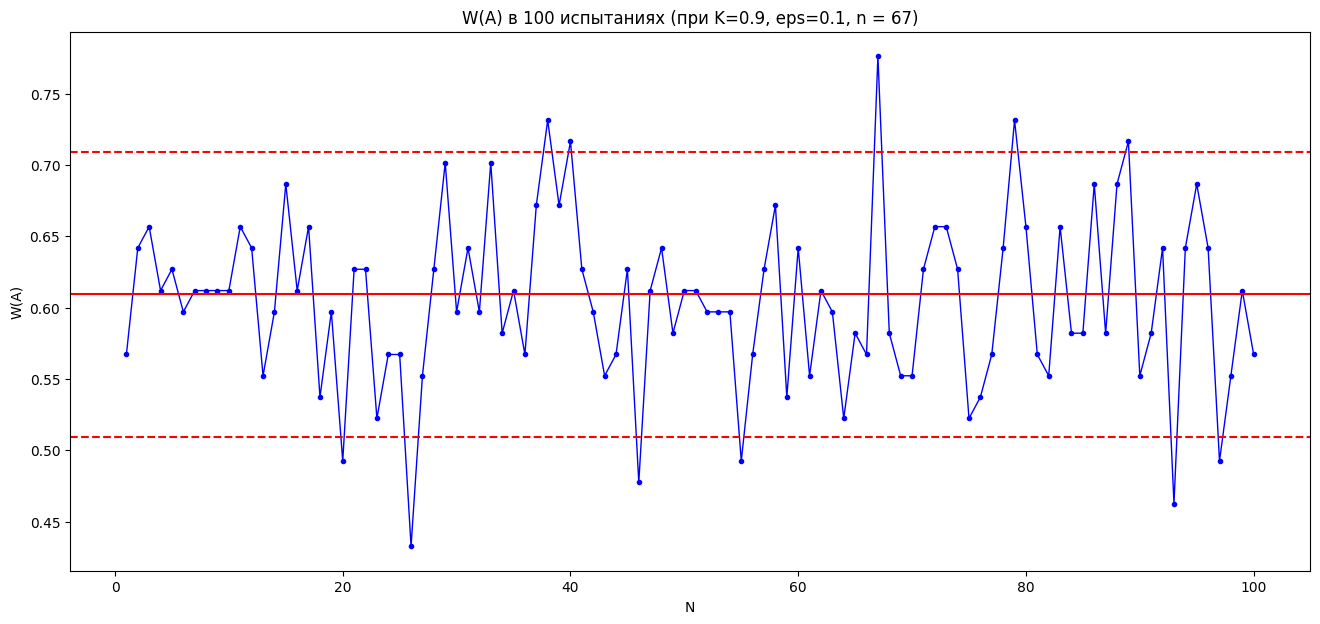

Количество значений, которые попали в диапазон p ± eps: 89


In [17]:
eps = 0.1
K = 0.9

n = int(pow(1/(2*eps) * stats.norm.ppf((K + 1) / 2), 2))
print(f"Полученное количество испытаний = {n}")

tests = []
tests_number = np.arange(1, N+1)
for i in range(N):
    T_values = stats.lognorm.rvs(s=std_norm, scale=np.exp(mean_norm), size=n)
    W_A = np.mean(T_values < 5)
    tests.append(W_A)

p = stats.lognorm.cdf(5, s=std_norm, scale=np.exp(mean_norm))

successful_tests = np.sum((tests >= (p - eps)) & (tests <= (p + eps)))

plt.figure(figsize=[16, 7])
plt.title("W(A) в 100 испытаниях (при K=0.9, eps=0.1, n = 67)")
plt.plot(tests_number, tests, 'b-o', linewidth=1, markersize=3)
plt.xlabel("N")
plt.ylabel("W(A)")
plt.axhline(p, color='red')
plt.axhline(p+eps, ls='--', color='red')
plt.axhline(p-eps, ls='--', color='red')
plt.show()

print(f"Количество значений, которые попали в диапазон p ± eps: {successful_tests}")

Зависимость K от уменьшения eps и n

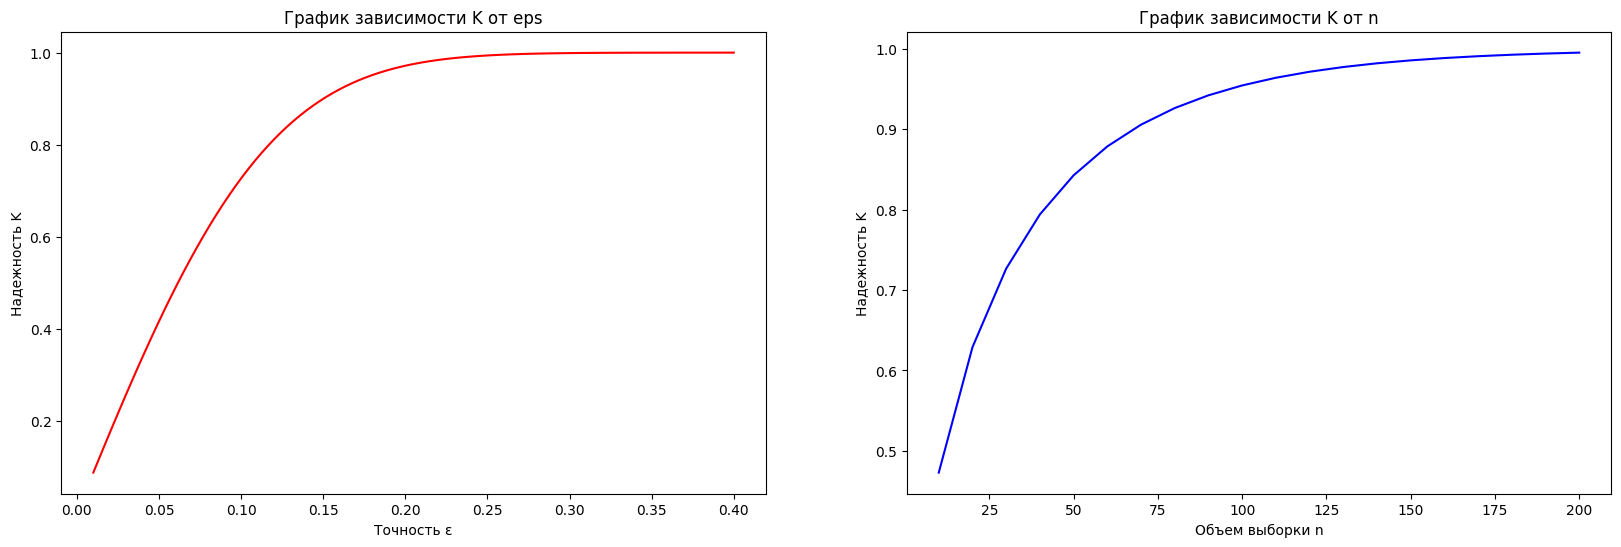

In [18]:
# Анализ зависимости надежности K от точности ε и объема выборки n
# Исследуем, как изменяется вероятность K = P(|W(A)-p| < ε) при различных параметрах

# Инициализация списков для хранения результатов
K_array1 = []  # K при фиксированном n и изменяющемся ε
K_array2 = []  # K при фиксированном ε и изменяющемся n
n_array = []   # Значения n для второго графика
eps_array = [] # Значения ε для первого графика

# Фиксированные параметры для исследования
eps_fixed = 0.1  # Фиксированная точность для исследования зависимости от n
n_fixed = 30     # Фиксированный объем выборки для исследования зависимости от ε

# Часть 1: Исследование зависимости K от ε при фиксированном n
# Создаем массив значений ε от 0.01 до 0.4 (100 равномерно распределенных точек)
eps_array = np.linspace(0.01, 0.4, 100)

# Для каждого значения ε вычисляем соответствующую надежность K
for eps in eps_array:
    # Формула: K = 2Φ(2√n·ε) - 1
    K = 2 * stats.norm.cdf(2 * np.sqrt(n_fixed) * eps) - 1
    K_array1.append(K)

# Часть 2: Исследование зависимости K от n при фиксированном ε
# Исследуем объемы выборки от 10 до 200 с шагом 10
for i in range(10, 201, 10):
    # Вычисляем K для текущего объема выборки i при фиксированной точности eps_fixed
    K = 2 * stats.norm.cdf(2 * np.sqrt(i) * eps_fixed) - 1
    K_array2.append(K)
    n_array.append(i)  # Сохраняем значение n для построения графика

# Построение графиков для визуализации зависимостей
plt.figure(figsize=[20, 6])

# Левый график: K от ε (при фиксированном n=30)
plt.subplot(1, 2, 1)
plt.title("График зависимости K от eps")
plt.plot(eps_array, K_array1, 'r')
plt.xlabel("Точность ε")  # Ось X: точность оценки
plt.ylabel("Надежность K")  # Ось Y: вероятность выполнения условия
# Этот график показывает: чем выше требуемая точность (меньше ε), 
# тем ниже надежность K при фиксированном объеме выборки

# Правый график: K от n (при фиксированном ε=0.1)
plt.subplot(1, 2, 2)
plt.title("График зависимости K от n")
plt.plot(n_array, K_array2, 'b')
plt.xlabel("Объем выборки n")  # Ось X: количество испытаний
plt.ylabel("Надежность K")  # Ось Y: вероятность выполнения условия
# Этот график показывает: чем больше объем выборки, 
# тем выше надежность K при фиксированной точности

plt.show()